# Mumbai Air Quality Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import random
from datetime import datetime

In [3]:
df = pd.read_csv('mumbai-aqi-2015.csv')

In [4]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,349.0,1/1/2004,Maharashtra,Mumbai,National Environmental Engineering Research In...,"Residential, Rural and other Areas",NaN,NaN,NaN,106.7,"Worli, Mumbai",NaN,2004-01-01
1,349.0,1/5/2004,Maharashtra,Mumbai,National Environmental Engineering Research In...,"Residential, Rural and other Areas",NaN,NaN,NaN,160.7,"Worli, Mumbai",NaN,2004-05-01
2,349.0,1/7/2004,Maharashtra,Mumbai,National Environmental Engineering Research In...,"Residential, Rural and other Areas",NaN,NaN,NaN,109.7,"Worli, Mumbai",NaN,2004-07-01
3,349.0,1/12/2004,Maharashtra,Mumbai,National Environmental Engineering Research In...,"Residential, Rural and other Areas",NaN,NaN,NaN,185.3,"Worli, Mumbai",NaN,2004-12-01
4,349.0,14-01-04,Maharashtra,Mumbai,National Environmental Engineering Research In...,"Residential, Rural and other Areas",NaN,NaN,NaN,149.0,"Worli, Mumbai",NaN,2004-01-14


In [5]:
df.shape

(2461, 13)

In [7]:
print(df.isna().sum())

stn_code                        774
sampling_date                     0
state                             0
location                          0
agency                          774
type                              0
so2                             479
no2                             320
rspm                            311
spm                            1295
location_monitoring_station       0
pm2_5                          2461
date                              0
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp_mean_so2 = SimpleImputer(missing_values=np.nan,  strategy='mean')
imp_mean_no2 = SimpleImputer(missing_values=np.nan,  strategy='mean')
imp_mean_rspm = SimpleImputer(missing_values=np.nan,  strategy='mean')
imp_mean_spm = SimpleImputer(missing_values=np.nan,  strategy='mean')

In [10]:
imp_mean_so2.fit(df[['so2']])
imp_mean_no2.fit(df[['no2']])
imp_mean_rspm.fit(df[['rspm']])
imp_mean_spm.fit(df[['spm']])

SimpleImputer()

In [12]:
df['so2'] = imp_mean_so2.fit_transform(df[['so2']]).ravel()
df['no2'] = imp_mean_no2.fit_transform(df[['no2']]).ravel()
df['rspm'] = imp_mean_rspm.fit_transform(df[['rspm']]).ravel()
df['spm'] = imp_mean_spm.fit_transform(df[['spm']]).ravel()

In [13]:
df.isna().sum()

stn_code                        774
sampling_date                     0
state                             0
location                          0
agency                          774
type                              0
so2                               0
no2                               0
rspm                              0
spm                               0
location_monitoring_station       0
pm2_5                          2461
date                              0
dtype: int64

In [14]:
data_clean = df.drop(['sampling_date','state','agency', 'pm2_5','stn_code','location' ], axis=1)

In [15]:
data_clean_backup = data_clean.copy()

In [16]:
data_clean.head()

,type,so2,no2,rspm,spm,location_monitoring_station,date
0,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,106.7,"Worli, Mumbai",2004-01-01
1,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,160.7,"Worli, Mumbai",2004-05-01
2,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,109.7,"Worli, Mumbai",2004-07-01
3,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,185.3,"Worli, Mumbai",2004-12-01
4,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,149.0,"Worli, Mumbai",2004-01-14


In [17]:
data_clean['location_monitoring_station'].unique()

array(['Worli, Mumbai',
       'Bank of India, Kalbadevi Branch, Kalbadevi, Mumbai',
       'Parel T.T., BMC Southward Office, DR. Ambedkar Road, Mumbai',
       'Parel', 'Kalbadevi', 'Worli'], dtype=object)

In [18]:
locn = ['Worli','Kalbadevi', 'Parel']

In [19]:
data_clean['location_monitoring_station'] = data_clean['location_monitoring_station'].replace('Worli, Mumbai',locn[0])
data_clean['location_monitoring_station'] = data_clean['location_monitoring_station'].replace('Bank of India, Kalbadevi Branch, Kalbadevi, Mumbai',locn[1])
data_clean['location_monitoring_station'] = data_clean['location_monitoring_station'].replace('Parel T.T., BMC Southward Office, DR. Ambedkar Road, Mumbai',locn[2])

In [20]:
data_clean['location_monitoring_station'].unique()

array(['Worli', 'Kalbadevi', 'Parel'], dtype=object)

In [21]:
data_clean['date'] = pd.to_datetime(data_clean.date).dt.strftime('%d-%b-%Y')

In [22]:
data_clean.head()

,type,so2,no2,rspm,spm,location_monitoring_station,date
0,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,106.7,Worli,01-Jan-2004
1,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,160.7,Worli,01-May-2004
2,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,109.7,Worli,01-Jul-2004
3,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,185.3,Worli,01-Dec-2004
4,"Residential, Rural and other Areas",6.040515,29.293274,113.646977,149.0,Worli,14-Jan-2004


In [23]:
data_clean_backup = data_clean.copy()

In [24]:
pd.options.display.float_format = '{:.2f}'.format

In [25]:
data_clean.head()

,type,so2,no2,rspm,spm,location_monitoring_station,date
0,"Residential, Rural and other Areas",6.04,29.29,113.65,106.70,Worli,01-Jan-2004
1,"Residential, Rural and other Areas",6.04,29.29,113.65,160.70,Worli,01-May-2004
2,"Residential, Rural and other Areas",6.04,29.29,113.65,109.70,Worli,01-Jul-2004
3,"Residential, Rural and other Areas",6.04,29.29,113.65,185.30,Worli,01-Dec-2004
4,"Residential, Rural and other Areas",6.04,29.29,113.65,149.00,Worli,14-Jan-2004


In [26]:
data_clean.groupby("type").size()

type
Industrial Area                        594
Industrial Areas                       262
Residential and others                 512
Residential, Rural and other Areas    1093
dtype: int64

In [27]:
types = ['Industrial Areas','Residential','Residential and Rural']

In [28]:
data_clean['type'] = data_clean['type'].replace('Industrial Area',types[0])
data_clean['type'] = data_clean['type'].replace('Residential and others',types[1])
data_clean['type'] = data_clean['type'].replace('Residential, Rural and other Areas',types[2])

In [29]:
data_clean.groupby("type").size()

type
Industrial Areas          856
Residential               512
Residential and Rural    1093
dtype: int64

In [30]:
data_clean_backup = data_clean.copy()

In [31]:
data_clean['Year'] = pd.to_datetime(data_clean['date']).dt.year
data_clean['Month'] = pd.to_datetime(data_clean['date']).dt.strftime('%b')

In [32]:
data_clean.head()

,type,so2,no2,rspm,spm,location_monitoring_station,date,Year,Month
0,Residential and Rural,6.04,29.29,113.65,106.70,Worli,01-Jan-2004,2004,Jan
1,Residential and Rural,6.04,29.29,113.65,160.70,Worli,01-May-2004,2004,May
2,Residential and Rural,6.04,29.29,113.65,109.70,Worli,01-Jul-2004,2004,Jul
3,Residential and Rural,6.04,29.29,113.65,185.30,Worli,01-Dec-2004,2004,Dec
4,Residential and Rural,6.04,29.29,113.65,149.00,Worli,14-Jan-2004,2004,Jan


In [33]:
data_clean = data_clean.rename(columns={'location_monitoring_station':'location'})

In [34]:
data_clean_backup = data_clean.copy()

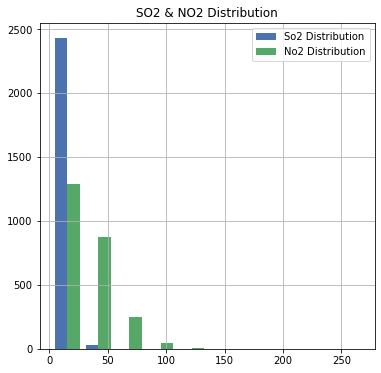

In [36]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
plt.grid(True)
x = data_clean['so2']
y = data_clean['no2']
plt.hist([x,y], label=['So2 Distribution','No2 Distribution'])
plt.legend(loc='upper right')
plt.title('SO2 & NO2 Distribution')
plt.show()

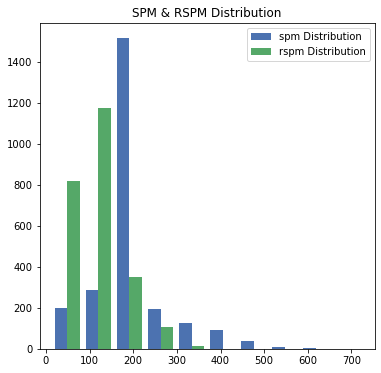

In [37]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
x = data_clean['spm']
y = data_clean['rspm']
plt.hist([x,y], label=['spm Distribution','rspm Distribution'])
plt.legend(loc='upper right')
plt.title('SPM & RSPM Distribution')
plt.show()

In [38]:
data_clean_feature = pd.DataFrame(data_clean, columns= ['so2','no2','spm','rspm'])
data_clean_feature.head()

,so2,no2,spm,rspm
0,6.04,29.29,106.70,113.65
1,6.04,29.29,160.70,113.65
2,6.04,29.29,109.70,113.65
3,6.04,29.29,185.30,113.65
4,6.04,29.29,149.00,113.65


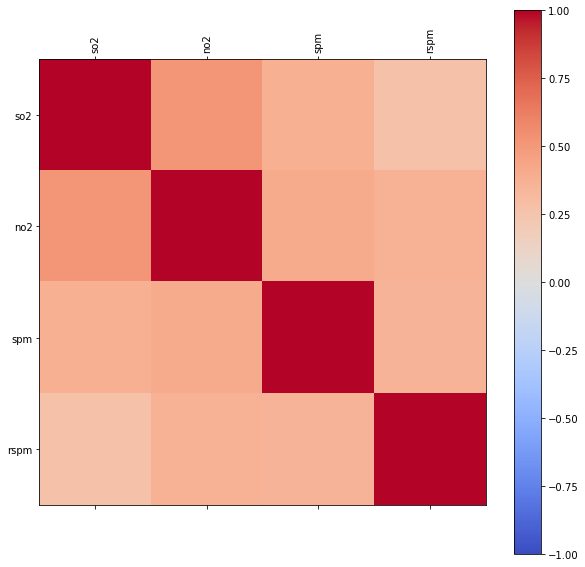

In [39]:
corr = data_clean_feature.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_clean_feature.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_clean_feature.columns)
ax.set_yticklabels(data_clean_feature.columns)
plt.show()

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'RSPM Distribution Across Mumbai')

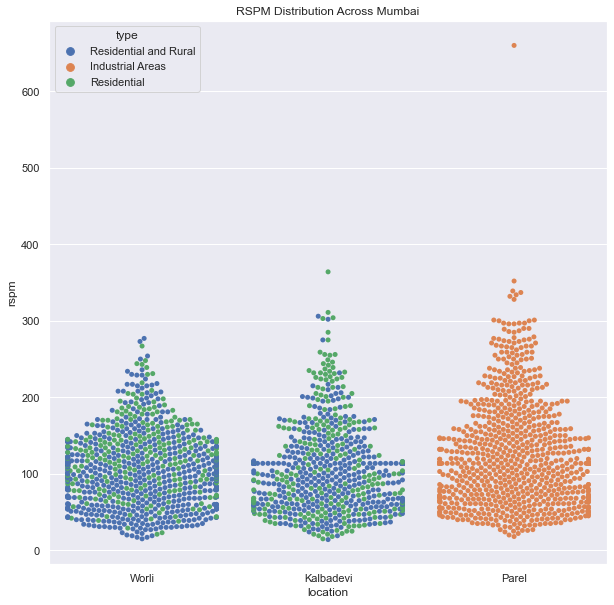

In [41]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.swarmplot (x='location', y='rspm', data=data_clean, hue = 'type')
plt.title('RSPM Distribution Across Mumbai')

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'SPM Distribution Across Mumbai')

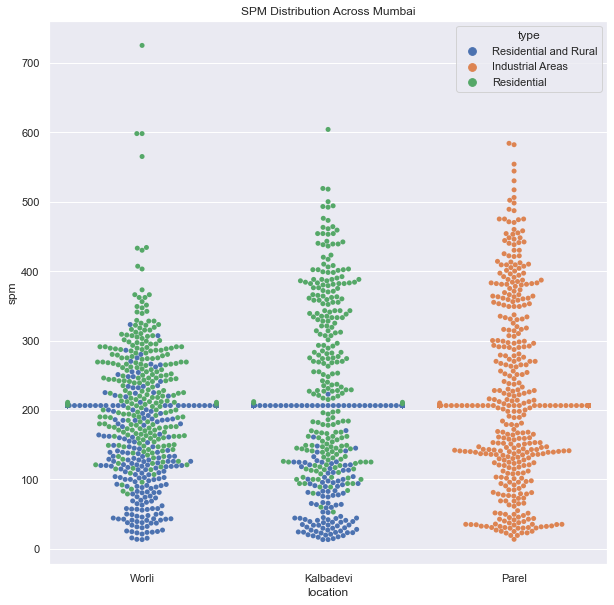

In [43]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.swarmplot (x='location', y='spm', data=data_clean, hue = 'type')
plt.title('SPM Distribution Across Mumbai')

Text(0.5, 1.0, 'SO2 Increase over the Years per Location')

<Figure size 1440x1440 with 0 Axes>

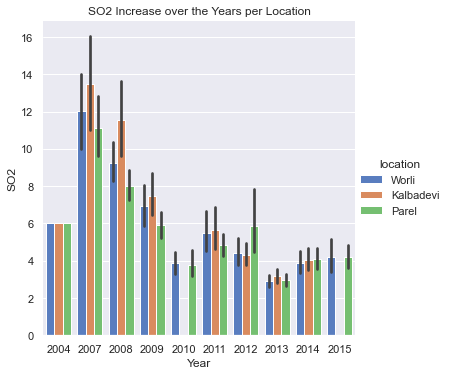

In [45]:
g = plt.figure(figsize=(20,20))
g = sns.catplot(x="Year", y="so2", hue="location", data=data_clean, kind="bar", palette="muted")
g.set_titles("SO2 Concentration")
g.despine(left=True)
g.set_ylabels("SO2")
plt.title("SO2 Increase over the Years per Location")

Text(0.5, 1.0, 'SPM Distribution per Year for all location types')

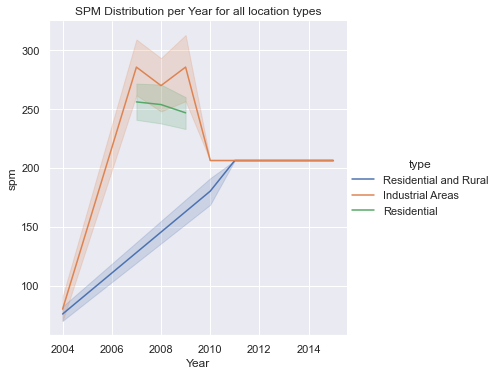

In [46]:
sns.relplot(x="Year", y="spm", kind="line", hue="type",data=data_clean)
plt.title("SPM Distribution per Year for all location types")

Text(0.5, 1.0, 'RSPM Distribution per Year for all location types')

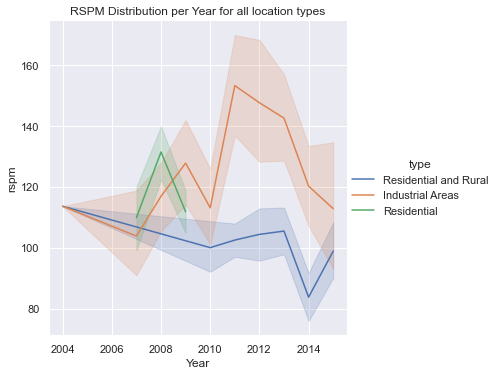

In [47]:
sns.relplot(x="Year", y="rspm", kind="line", hue="type",data=data_clean)
plt.title("RSPM Distribution per Year for all location types")


Text(0.5, 1.0, 'NO2 Distribution per Year for all location types')

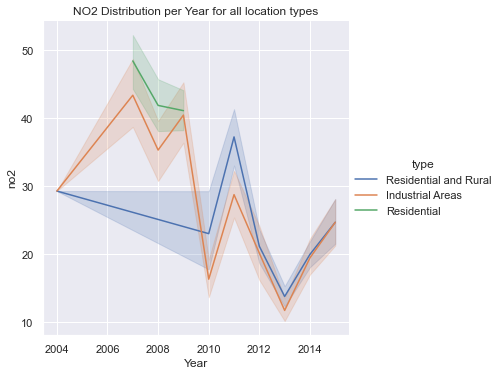

In [48]:
sns.relplot(x="Year", y="no2", kind="line", hue="type",data=data_clean)
plt.title("NO2 Distribution per Year for all location types")